Randomness policy:  You must derive your personal seed and assigned settings from your student email/ID as shown below in the code. All random draws must use this seed. Your notebook must display your seed and assigned parameters in the first section.

	Reproducibility & Personalization:  (show the code below at the top cell of your notebook):
	The code below will use your studentID/email to generate personalized seed and other parameters
	(like dataset selection and other hyper parameters that are needed for the project)
	Please add your student ID or UMKC email to “STUDENT_ID_STR” variable (highlighted below)
	to generate your project parameters and use these throughout in your project.
	Failure to do so will cause reduction of lot of points.

Code:
```
import hashlib, numpy as np, random

STUDENT_ID_STR = "your_school_email_or_studentID_here"

# Personal seed derived from hash (stable, unique)
seed = int(hashlib.sha256(STUDENT_ID_STR.encode()).hexdigest(), 16) % (10**9)
rng = np.random.default_rng(seed)
random.seed(seed)
np.random.seed(seed)

# Assigned parameters (unique to each student)
dataset_pick     = rng.integers(0, 3)                 # 0/1/2 choose dataset
cv_folds         = int(rng.choice([4,5,6,7,8]))       # K for K-fold CV
bootstrap_B      = int(rng.choice([400, 600, 800]))   # bootstrap replicates
outlier_method   = rng.choice(["IQR", "zscore"])      # handling strategy
knn_k            = int(rng.choice([3,5,7,9]))         # K for KNN
tree_depth       = int(rng.choice([3,4,5,6,7]))       # max depth for trees
sim_bias_p       = float(rng.choice([0.35, 0.45, 0.55, 0.65]))  # for simulation
viz_trick        = rng.choice(["truncated_y", "unequal_bins", "dual_axis"])  # ethics plot variant

print({
    "seed": seed, "dataset_pick": int(dataset_pick), "cv_folds": cv_folds,
    "bootstrap_B": bootstrap_B, "outlier_method": outlier_method,
    "knn_k": knn_k, "tree_depth": tree_depth, "sim_bias_p": sim_bias_p,
    "viz_trick": viz_trick
})
```




Dataset assignment :
The output of the above code will tell you which dataset to use based on following mapping:

	dataset_pick = 0 → sklearn.datasets.load_breast_cancer() (binary classification)

	dataset_pick = 1 → sklearn.datasets.load_wine() (multiclass; convert to binary: class 0 vs others)

	dataset_pick = 2 → sklearn.datasets.load_iris() (multiclass; convert to binary: setosa vs non-setosa)

Convert to a binary classification target as specified above (for consistency with confusion-matrix/ROC tasks).

Academic Integrity & Reproducibility
	Put the seed/assignment dictionary printout at the top of your notebook (Part 0).
	Set all random_state/np.random/rng to your seed.


In [54]:
import hashlib, numpy as np, random

STUDENT_ID_STR = "jv3c8@umsystem.edu"

# Personal seed derived from hash (stable, unique)
seed = int(hashlib.sha256(STUDENT_ID_STR.encode()).hexdigest(), 16) % (10**9)
rng = np.random.default_rng(seed)
random.seed(seed)
np.random.seed(seed)    # Sets the random seed (8083450)

# Assigned parameters (unique to each student)
dataset_pick     = rng.integers(0, 3)                 # 0/1/2 choose dataset
cv_folds         = int(rng.choice([4,5,6,7,8]))       # K for K-fold CV
bootstrap_B      = int(rng.choice([400, 600, 800]))   # bootstrap replicates
outlier_method   = rng.choice(["IQR", "zscore"])      # handling strategy
knn_k            = int(rng.choice([3,5,7,9]))         # K for KNN
tree_depth       = int(rng.choice([3,4,5,6,7]))       # max depth for trees
sim_bias_p       = float(rng.choice([0.35, 0.45, 0.55, 0.65]))  # for simulation
viz_trick        = rng.choice(["truncated_y", "unequal_bins", "dual_axis"])  # ethics plot variant

output_params = {
    "seed": seed,
    "dataset_pick": int(dataset_pick),
    "cv_folds": cv_folds,
    "bootstrap_B": bootstrap_B,
    "outlier_method": outlier_method,
    "knn_k": knn_k,
    "tree_depth": tree_depth,
    "sim_bias_p": sim_bias_p,
    "viz_trick": viz_trick
}

for key, value in output_params.items():
    print(f"{key}: {value}")

seed: 8083450
dataset_pick: 2
cv_folds: 7
bootstrap_B: 600
outlier_method: IQR
knn_k: 3
tree_depth: 4
sim_bias_p: 0.45
viz_trick: truncated_y


In [76]:
#df <- sklearn.datasets.load_iris() #(multiclass; convert to binary: setosa vs non-setosa)
from sklearn import datasets
import pandas as pd

# Load the Iris dataset
irisData = datasets.load_iris()

# Convert to DataFrame for easy viewing
df = pd.DataFrame(irisData.data, columns=irisData.feature_names)

df['target'] = irisData.target # Target variable (species: 0 for setosa, 1 for versicolor, 2 for virginica)
df['target_names'] = [irisData.target_names[i] for i in irisData.target] # Convert target

#Code gleaned from my repo for Assignment 1, Question 1
df['IsSetosa'] = (df['target'] == 0).astype('boolean')
df['IsVersicolor'] = (df['target'] == 1).astype('boolean')  #Not required, but might be useful downstream
df['IsVirginica'] = (df['target'] == 2).astype('boolean')   #Not required, but might be useful downstream

#Since we'll need k-fold later, we should add it now.
folds = [1,2,3,4,5,6,7]               # Assign each row a random fold (7-fold)
#To ensure even distribution, create a repeated list of groups to cover all rows in df
kfold_groups = np.tile(folds, len(df) // len(folds) + 1)[:len(df)]
np.random.shuffle(kfold_groups)       #Shuffle to randomize order
df['k_fold_group'] = kfold_groups     # Assign to new column

df


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names,IsSetosa,IsVersicolor,IsVirginica,k_fold_group
0,5.1,3.5,1.4,0.2,0,setosa,True,False,False,6
1,4.9,3.0,1.4,0.2,0,setosa,True,False,False,2
2,4.7,3.2,1.3,0.2,0,setosa,True,False,False,4
3,4.6,3.1,1.5,0.2,0,setosa,True,False,False,2
4,5.0,3.6,1.4,0.2,0,setosa,True,False,False,3
...,...,...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica,False,False,True,7
146,6.3,2.5,5.0,1.9,2,virginica,False,False,True,6
147,6.5,3.0,5.2,2.0,2,virginica,False,False,True,1
148,6.2,3.4,5.4,2.3,2,virginica,False,False,True,2


# Notes on Discovery:

*Source: https://www.geeksforgeeks.org/data-science/iris-dataset/*

The Iris dataset consists of 150 samples of iris flowers from three different species: Setosa, Versicolor, and Virginica. Each sample includes four features: sepal length, sepal width, petal length, and petal width. It was introduced by the British biologist and statistician Ronald Fisher in 1936 as an example of discriminant analysis.

The Iris dataset is often used as a beginner's dataset to understand classification and clustering algorithms in machine learning. By using the features of the iris flowers, researchers and data scientists can classify each sample into one of the three species.

This dataset is particularly popular due to its simplicity and the clear separation of the different species based on the features provided. The four features are all measured in centimeters.

Sepal Length: The length of the iris flower's sepals (the green leaf-like structures that encase the flower bud).
Sepal Width: The width of the iris flower's sepals.
Petal Length: The length of the iris flower's petals (the colored structures of the flower).
Petal Width: The width of the iris flower's petals.
The target variable represents the species of the iris flower and has three classes: Iris setosa, Iris versicolor, and Iris virginica.

Iris setosa: Characterized by its relatively small size, with distinctive characteristics in sepal and petal dimensions.
Iris versicolor: Moderate in size, with features falling between those of Iris setosa and Iris virginica.
Iris virginica: Generally larger in size, with notable differences in sepal and petal dimensions compared to the other two species.

In [56]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names,IsSetosa,IsVersicolor,IsVirginica,k_fold_group
0,5.1,3.5,1.4,0.2,0,setosa,True,False,False,2
1,4.9,3.0,1.4,0.2,0,setosa,True,False,False,6
2,4.7,3.2,1.3,0.2,0,setosa,True,False,False,6
3,4.6,3.1,1.5,0.2,0,setosa,True,False,False,3
4,5.0,3.6,1.4,0.2,0,setosa,True,False,False,3
...,...,...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica,False,False,True,1
146,6.3,2.5,5.0,1.9,2,virginica,False,False,True,1
147,6.5,3.0,5.2,2.0,2,virginica,False,False,True,6
148,6.2,3.4,5.4,2.3,2,virginica,False,False,True,6


# Part A — Ethics & Graphics Literacy (Lecture 8) — 15 pts
Generate a misleading chart: **truncated_y**

Make a bar chart whose y-axis starts at a high value, exaggerating differences.

Explain the trick: In 4–6 sentences, describe exactly why the graphic is misleading and how an uninformed reader could be deceived.

Fix it: Replot the graphic ethically (e.g., start y at 0, use equal bin widths or density, avoid dual-axis or clearly normalize/annotate). Add a caption explaining the fix.

Grading: correctness of identification, clarity of explanation, and quality of the corrected plot.

{'seed': 8083450, 'dataset_pick': 2, 'viz_trick': np.str_('truncated_y')}


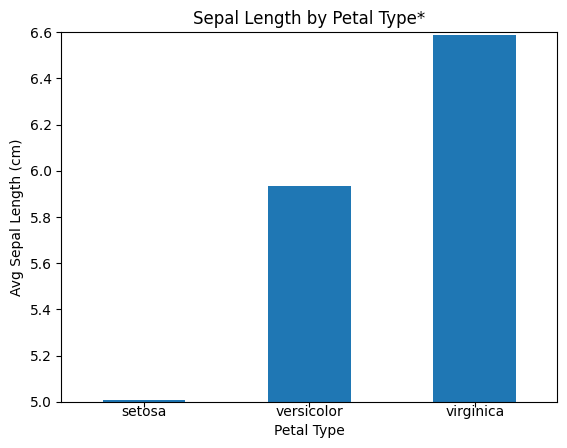

Explain the trick: In 4–6 sentences, describe exactly why the graphic is misleading and how an uninformed reader could be deceived.
I selected the Sepal Length, because the variation between the min and max of the range is 1.582 (around 30% of the mean for each species).
Knowing that the minimum value was 5.006, I set the y-axis to start at 5.0. This toys with the reader's assumptions and makes the sepal length look non-existent.
Knowinng that the highest value was 6.588, I set the height of the chart to 6.6, further exaggerating the variance.
An uninformed reader would be mislead to assume there is a dramatic difference between the sepal width of the three iris species.


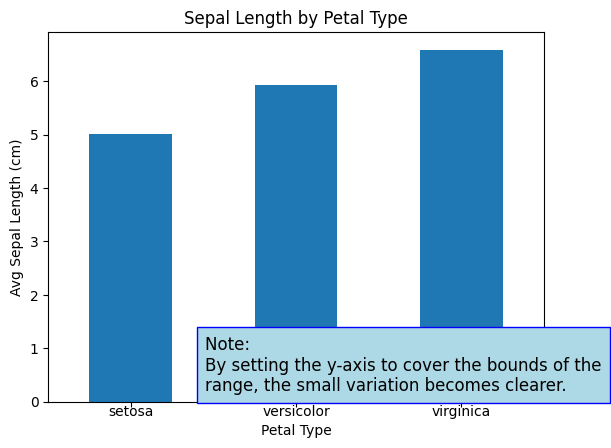

In [57]:
print({
    "seed": seed, "dataset_pick": int(dataset_pick),
    "viz_trick": viz_trick
})
#Code gleaned from Assignment 1, Question 2, Visualization #3

import matplotlib.pyplot as plt
import numpy as np

average_sepal_length = df.groupby('target_names')['sepal length (cm)'].mean()
average_sepal_length.plot(kind='bar')

plt.title('Sepal Length by Petal Type*')
plt.xlabel('Petal Type')
plt.ylabel('Avg Sepal Length (cm)')
plt.ylim(5, 6.6) # Set y-axis
plt.xticks(rotation=0, ha='center', va='center') # Rotate x-axis labels for better readability
plt.show()

print("Explain the trick: In 4–6 sentences, describe exactly why the graphic is misleading and how an uninformed reader could be deceived.",
      "I selected the Sepal Length, because the variation between the min and max of the range is 1.582 (around 30% of the mean for each species).",
      "Knowing that the minimum value was 5.006, I set the y-axis to start at 5.0. This toys with the reader's assumptions and makes the sepal length look non-existent.",
      "Knowinng that the highest value was 6.588, I set the height of the chart to 6.6, further exaggerating the variance.",
      "An uninformed reader would be mislead to assume there is a dramatic difference between the sepal width of the three iris species.",
      sep="\n")

average_sepal_length = df.groupby('target_names')['sepal length (cm)'].mean()
average_sepal_length.plot(kind='bar')


JVinasComment = "Note: \nBy setting the y-axis to cover the bounds of the range, the small variation becomes clearer."
plt.text(0.45, 0.25, JVinasComment, fontsize=12, color='black', wrap=True, bbox=dict(boxstyle='square,pad=0.5', fc='lightblue', ec='blue'))

plt.title('Sepal Length by Petal Type')
plt.xlabel('Petal Type')
plt.ylabel('Avg Sepal Length (cm)')
plt.ylim(0) #, top=10)
plt.xticks(rotation=0, ha='center', va='center') # Rotate x-axis labels for better readability
plt.show()

#Part B
**Sampling, Standard Error, Bootstrap, Outliers (Lecture 9) — 20 pts**

Using your assigned tabular dataset (dataset is assigned based on code provided above):

**Sampling with/without replacement:**
Draw samples of sizes n ∈ {30, 60, 120, 240} both with replacement and without replacement.
For a chosen continuous feature (pick the feature with highest variance), estimate the sample mean and standard error (SE) under both schemes.

Plot SE vs n and discuss how SE changes with n and why with-replacement SE approximations differ from without-replacement (finite-population correction).


In [58]:
feature_list = ['sepal length (cm)',
                'sepal width (cm)',
                'petal length (cm)',
              'petal width (cm)']           #Build a list of valid features to work through
variances = df[feature_list].var()          #Get the variance (difference between min/max) for each feature

print(variances)
use_feature = variances.idxmax()            #Use the feature with the highest (max) variance

print(f"Selection: {use_feature}")

sepal length (cm)    0.685694
sepal width (cm)     0.189979
petal length (cm)    3.116278
petal width (cm)     0.581006
dtype: float64
Selection: petal length (cm)


In [59]:
import numpy as np
import pandas as pd

feature_population = df[use_feature].values #Build a list using only these values

pop_stddev = np.std(feature_population)
pop_mean = np.mean(feature_population)

#Draw samples of sizes n ∈ {30, 60, 120, 240} both with replacement and without replacement.
sample_sizes = [30, 60, 120, 240]

sample_results = {"With Replacement": {}, "Without Replacement": {}}
for n in sample_sizes:
  if n >= len(feature_population):
    sample_results["With Replacement"][n] = np.random.choice(feature_population, size=n, replace=True)
  else:
    sample_results["With Replacement"][n] = np.random.choice(feature_population, size=n, replace=True)
    sample_results["Without Replacement"][n] = np.random.choice(feature_population, size=n, replace=False)

#Create an empty dataframe
results_table = pd.DataFrame({
    'Sample Size': pd.Series(dtype='int'),
    'Replacement': pd.Series(dtype='boolean'),
    'Mean': pd.Series(dtype='float'),
    'Std Dev': pd.Series(dtype='float'),
    'Std Err': pd.Series(dtype='float')
})

#Estimate the sample mean and standard error (SE) under both schemes.
for n in sample_sizes:
  for curSubset in ["With Replacement", "Without Replacement"]:
    if n >= len(feature_population) and curSubset == "Without Replacement":
      continue
    else:
      used_replacement = curSubset == "With Replacement"
      new_result = pd.DataFrame(
      {
        'Sample Size': [n],
        'Replacement': [used_replacement],
        'Mean': [np.mean(sample_results[curSubset][n])],
        'Std Dev': [np.std(sample_results[curSubset][n])],
        'Std Err': [np.std(sample_results[curSubset][n]) / np.sqrt(n)]
      }
      )
      results_table = pd.concat([results_table, new_result], ignore_index=True)

results_table

,Sample Size,Replacement,Mean,Std Dev,Std Err
0,30,True,3.780000,1.723059,0.314586
1,30,False,3.436667,1.988212,0.362996
2,60,True,3.776667,1.707666,0.220459
3,60,False,3.720000,1.848044,0.238581
4,120,True,3.760000,1.749162,0.159676
5,120,False,3.735833,1.744744,0.159273
6,240,True,3.908333,1.744065,0.112579


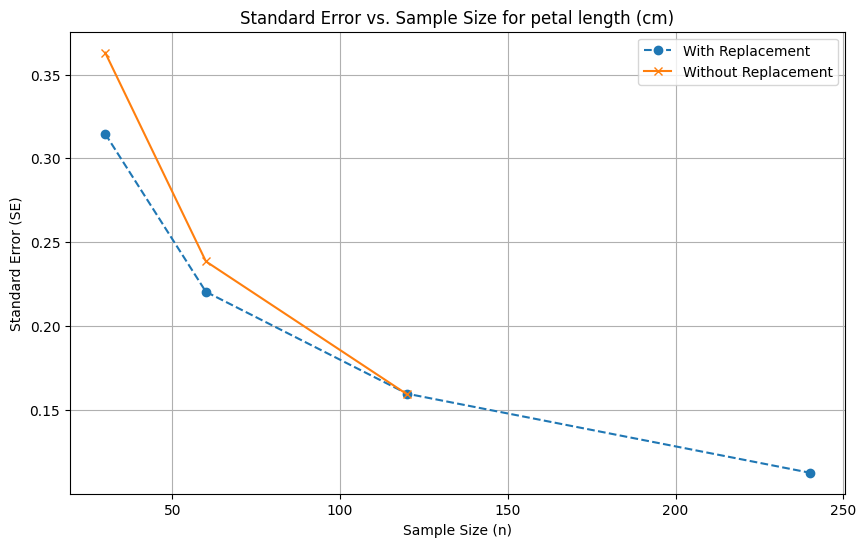

In [60]:
#Plot SE vs n
#Discuss how SE changes with n
#Discuss why with-replacement SE approximations differ from without-replacement (finite-population correction).

import matplotlib.pyplot as plt

# Filter data for 'With Replacement'
df_with_replacement = results_table[results_table['Replacement'] == True].copy()

# Filter data for 'Without Replacement', dropping NaN SE values which occur when n > population_size
df_without_replacement = results_table[results_table['Replacement'] == False].dropna(subset=['Std Err']).copy()

plt.figure(figsize=(10, 6))

# Plot 'With Replacement'
plt.plot(df_with_replacement['Sample Size'], df_with_replacement['Std Err'], marker='o', label='With Replacement', linestyle='--')

# Plot 'Without Replacement'
plt.plot(df_without_replacement['Sample Size'], df_without_replacement['Std Err'], marker='x', label='Without Replacement', linestyle='-')

plt.title('Standard Error vs. Sample Size for ' + use_feature)
plt.xlabel('Sample Size (n)')
plt.ylabel('Standard Error (SE)')
plt.grid(True)
plt.legend()
plt.show()

The standard error (SE) is the standard deviation of the mean in repeated samples from a population. As the size of the population increases, the SE decreases. It is calculated as the std. dev. of the sample divided by the square root of the sample size. As the sample size increases, the standard error will tend to fall. This is illustrated in the chart above.

Sampling with replacement allows for a single sample to be selected multiple times. Sampling without replacement means that once a sample is selected, it cannot be reused.
Sampling with replacement results in each sample being independent of the other samples as the outcome of one random draw is not affected by the previous draw.
We can't run "Without Replacement" for the sample size of 240 samples because the raw dataset only has 150 samples to work with. Once we have used up the 150 samples, there are no further samples available to reference.

This nuance is particularly important when working with small datasets, such as the iris dataset which only has 150 samples.

#Part B: Bootstrap

**Bootstrap the mean of the same feature:**
Use bootstrap_B replicates (coming from the code above); build a 95% confidence interval (CI) (percentile method).
Compare the bootstrap CI width to the theoretical SE-based CI. Briefly interpret.

In [61]:
#**Bootstrap the mean of the same feature:**
#Use bootstrap_B replicates (coming from the code above); build a 95% confidence interval (CI) (percentile method).
#Compare the bootstrap CI width to the theoretical SE-based CI. Briefly interpret.

bootstrap_means = []
for _ in range(bootstrap_B):
    # Draw a sample with replacement from feature_population
    bootstrap_sample = rng.choice(feature_population, size=len(feature_population), replace=True)
    bootstrap_means.append(np.mean(bootstrap_sample))

# Convert to array to get the percentile calculation
bootstrap_means = np.array(bootstrap_means)

#Figure out the 95% confidence interval
lower_bound_bootstrap = np.percentile(bootstrap_means, 2.5)
upper_bound_bootstrap = np.percentile(bootstrap_means, 97.5)

#Compare the bootstrap confidence interval with the theoretical CI
pop_std = np.std(feature_population, ddof=1) # Using ddof=1 for sample std dev as best estimate for population
pop_mean = np.mean(feature_population)

#Figure out what the standard Error of the mean for the full population size would have been
ideal_se = pop_std / np.sqrt(len(feature_population))

#Per the Z-Score chart, a 95% CI's z-score is about 1.96
ideal_margin_of_error = 1.96 * ideal_se

lower_bound_theoretical = pop_mean - ideal_margin_of_error
upper_bound_theoretical = pop_mean + ideal_margin_of_error

print(f"Bootstrap 95% Confidence Interval for the mean of {use_feature}:")
print(f" Lower bound: {lower_bound_bootstrap:.3f}")
print(f" Upper bound: {upper_bound_bootstrap:.3f}")
print(f" Range: {upper_bound_bootstrap - lower_bound_bootstrap:.3f}")
print("\n")
print(f"Theoretical 95% Confidence Interval for the mean of {use_feature}:")
print(f" Lower bound: {lower_bound_theoretical:.3f}")
print(f" Upper bound: {upper_bound_theoretical:.3f}")
print(f" Range: {upper_bound_theoretical - lower_bound_theoretical:.3f}")

Bootstrap 95% Confidence Interval for the mean of petal length (cm):
 Lower bound: 3.467
 Upper bound: 4.033
 Range: 0.566


Theoretical 95% Confidence Interval for the mean of petal length (cm):
 Lower bound: 3.475
 Upper bound: 4.041
 Range: 0.565


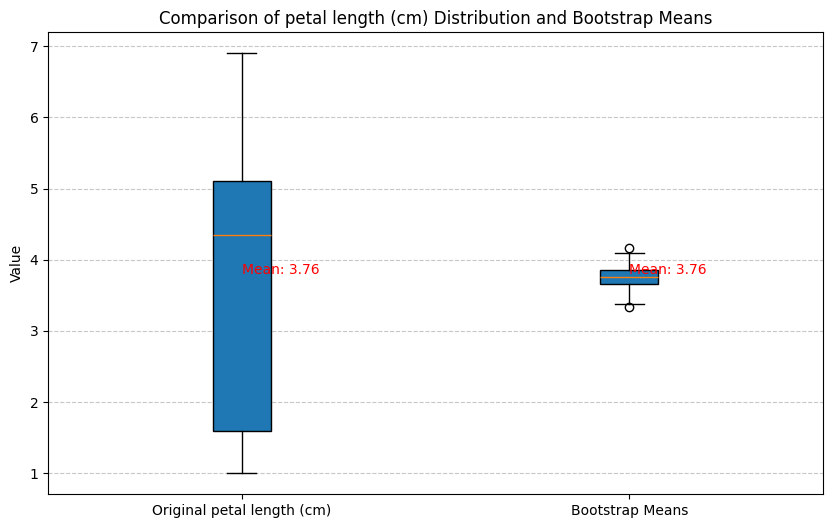

In [62]:
import matplotlib.pyplot as plt
import numpy as np

# Prepare the data for the boxplot
data_to_plot = [feature_population, bootstrap_means]
labels = [f'Original {use_feature}', 'Bootstrap Means']

# Calculate the means
mean_original = np.mean(feature_population)
mean_bootstrap = np.mean(bootstrap_means)

# Create the boxplot, removing 'showmeans=True'
plt.figure(figsize=(10, 6))
bp = plt.boxplot(data_to_plot, tick_labels=labels, patch_artist=True)

# Add titles and labels
plt.title(f'Comparison of {use_feature} Distribution and Bootstrap Means')
plt.ylabel('Value')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate the mean values on the boxplot
# The x-coordinates for the boxes are 1 and 2
plt.text(1, mean_original, f'Mean: {mean_original:.2f}',
         verticalalignment='bottom', horizontalalignment='left', color='red', fontsize=10)
plt.text(2, mean_bootstrap, f'Mean: {mean_bootstrap:.2f}',
         verticalalignment='bottom', horizontalalignment='left', color='red', fontsize=10)

plt.show()

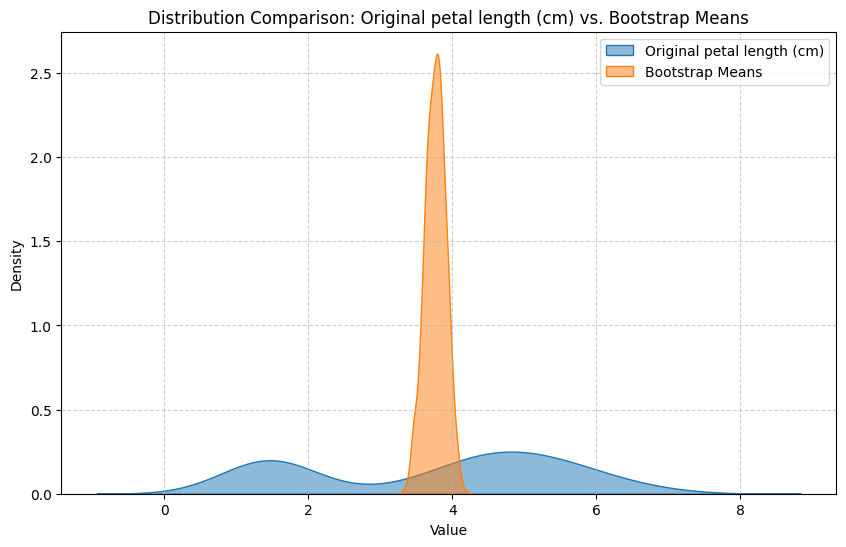

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.kdeplot(feature_population, label=f'Original {use_feature}', fill=True, alpha=0.5)
sns.kdeplot(bootstrap_means, label='Bootstrap Means', fill=True, alpha=0.5)

plt.title(f'Distribution Comparison: Original {use_feature} vs. Bootstrap Means')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

### Part B.2: Bootstrap Interpretation

The theoretical range with a 95% confidence intervale for petal length against the source data is 0.565, ranging from 3.475 to 4.041.
The bootstrap results in a remarkably similar range of 0.548 with a spread from 3.482 to 4.030. This is an illustration of the central limit theorem, where datasets centralize around their mean.

Despite the data being spread much wider across the range, as displayed in the previous two charts the mean of the two datasets centralizes around the same point.

###Part B.3: Outliers

**Outliers:**
Inject 1% synthetic outliers into that feature (e.g., add +8σ values at random indices using your seed).
Handle outliers using your assigned method outlier_method (IQR trimming/winsorizing or z-score filtering).
Recompute mean & CI; compare before vs after in 3–5 sentences.

**Brief concept explanations:**

“add +8σ values at random indices using your seed”:

* Pick one numeric feature.
* Compute its mean μ and standard deviation σ.
* Randomly choose ~1% of row indices (using your personal seed).
* For those rows, inflate the feature to create outliers:

`X.loc[idx, feature] = mu + 8*sigma (or even X.loc[idx, f] += 8*sigma).`

This simulates extreme values far from the bulk of the data.

“IQR trimming/winsorizing” vs “z-score filtering”:

**IQR method (interquartile range):**

Compute Q1 (25th pct), Q3 (75th pct), IQR = Q3–Q1.

Trimming:
* remove rows with values < Q1−1.5·IQR or > Q3+1.5·IQR.
Winsorizing:
* cap values below Q1−1.5·IQR up to that lower bound, and above Q3+1.5·IQR down to that upper bound (keeps all rows; reduces outlier impact).

**z-score filtering:**

* Standardize the feature: z=(x-μ)/σ.
* Remove (or cap) rows where ∣z∣>k(common k = 3).
* This assumes roughly bell-shaped data
  * IQR is more robust for skewed data.

In [64]:
import numpy as np

#μ = Mean
#σ = Std. Dev.

#Create an empty dataframe
outliers_table = pd.DataFrame({
  'Data Source' : pd.Series(dtype='string'),
  'Mean (μ)' : pd.Series(dtype='float'),
  'Std Dev (σ)' : pd.Series(dtype='float'),
  'Lower Bound (2.5%)' : pd.Series(dtype='float'),
  '1st Quartile (25%)' : pd.Series(dtype='float'),
  '3rd Quartile (75%)' : pd.Series(dtype='float'),
  'Upper Bound (97.5%)' : pd.Series(dtype='float'),
  'Interquartile Range (IQR)' : pd.Series(dtype='float'),
  'Rows' : pd.Series(dtype='int')
})

#Report on the original 95% theoretical confidence interval bounds
outliers_table = pd.concat([outliers_table, pd.DataFrame(
  {
    'Data Source' : 'Original',
    'Mean (μ)' : [np.mean(feature_population)],                #mean_original
    'Std Dev (σ)' : [np.std(feature_population)],
    'Lower Bound (2.5%)' : [lower_bound_theoretical],
    '1st Quartile (25%)' : [np.percentile(feature_population, 25)],
    '3rd Quartile (75%)' : [np.percentile(feature_population, 75)],
    'Upper Bound (97.5%)' : [upper_bound_theoretical],
    'Interquartile Range (IQR)' : [(np.percentile(feature_population, 75) - np.percentile(feature_population, 25))],
    'Rows' : [len(feature_population)]
  }
  )], ignore_index=True)

#lower_bound_bootstrap = np.percentile(bootstrap_means, 2.5)
#upper_bound_bootstrap = np.percentile(bootstrap_means, 97.5)

#Report on the original 95% bootstrap confidence interval bounds
outliers_table = pd.concat([outliers_table, pd.DataFrame(
  {
    'Data Source': 'Bootstrap',
    'Mean (μ)' : [np.mean(bootstrap_means)],                     #mean_bootstrap
    'Std Dev (σ)' : [np.std(bootstrap_means)],
    'Lower Bound (2.5%)' : [np.percentile(bootstrap_means, 2.5)],   #lower_bound_bootstrap
    '1st Quartile (25%)' : [np.percentile(bootstrap_means, 25)],
    '3rd Quartile (75%)' : [np.percentile(bootstrap_means, 75)],
    'Upper Bound (97.5%)' : [np.percentile(bootstrap_means, 97.5)],   #upper_bound_bootstrap
    'Interquartile Range (IQR)' : [(np.percentile(bootstrap_means, 75) - np.percentile(bootstrap_means, 25))],
    'Rows' : [len(bootstrap_means)]
  }
  )], ignore_index=True)

injected_feature = feature_population.copy()    #Make a copy of the feature population, to not corrupt the source data

#Randomly choose ~1% of row indices (using your personal seed)
num_outliers = int(np.round(0.01 * len(injected_feature)))
selected_indices = rng.choice(len(injected_feature), size=num_outliers, replace=False)

#For those rows, inflate the feature to create outliers
for idx in selected_indices:
  injected_feature[idx] += 8 * np.std(feature_population)

#IQR = Interquartile Range
outliers_table = pd.concat([outliers_table, pd.DataFrame(
  {
    'Data Source': 'IQR Injection',
    'Mean (μ)' : [np.mean(injected_feature)],
    'Std Dev (σ)' : [np.std(injected_feature)],
    'Lower Bound (2.5%)' : [np.percentile(injected_feature, 2.5)],
    '1st Quartile (25%)' : [np.percentile(injected_feature, 25)],
    '3rd Quartile (75%)' : [np.percentile(injected_feature, 75)],
    'Upper Bound (97.5%)' : [np.percentile(injected_feature, 97.5)],
    'Interquartile Range (IQR)' : [(np.percentile(injected_feature, 75) - np.percentile(injected_feature, 25))],
    'Rows' : [len(injected_feature)]

  }
  )], ignore_index=True)

#Compute Q1 (25th pct) & Q3 (75th pct), IQR = Q3–Q1.
q1_injected_feature = np.percentile(injected_feature, 25)
q3_injected_feature = np.percentile(injected_feature, 75)
interquartile_range = q3_injected_feature - q1_injected_feature


#Trimming: remove rows with values < Q1−1.5·IQR or > Q3+1.5·IQR.
trimmed_injected_feature = injected_feature[
  (injected_feature >= (q1_injected_feature - (1.5*interquartile_range))) &
  (injected_feature <= (q3_injected_feature + (1.5*interquartile_range)))
  ]

outliers_table = pd.concat([outliers_table, pd.DataFrame(
  {
    'Data Source': 'IQR Trimming',
    'Mean (μ)' : [np.mean(trimmed_injected_feature)],
    'Std Dev (σ)' : [np.std(trimmed_injected_feature)],
    'Lower Bound (2.5%)' : [np.percentile(trimmed_injected_feature, 2.5)],
    '1st Quartile (25%)' : [1.5 * np.percentile(trimmed_injected_feature, 25)],
    '3rd Quartile (75%)' : [np.percentile(trimmed_injected_feature, 75)],
    'Upper Bound (97.5%)' : [np.percentile(trimmed_injected_feature, 97.5)],
    'Interquartile Range (IQR)' : [(np.percentile(trimmed_injected_feature, 75) - np.percentile(trimmed_injected_feature, 25))],
    'Rows' : [len(trimmed_injected_feature)]
  }
  )], ignore_index=True)


#Winsorizing: cap values below Q1−1.5·IQR up to that lower bound, and above Q3+1.5·IQR down to that upper bound (keeps all rows; reduces outlier impact).
winsorized_injected_feature = injected_feature.copy() #Make a copy of the injected data
winsorized_injected_feature[winsorized_injected_feature < (q1_injected_feature - (1.5 * interquartile_range))] = (q1_injected_feature - (1.5 * interquartile_range))
winsorized_injected_feature[winsorized_injected_feature > (q3_injected_feature + (1.5 * interquartile_range))] = (q3_injected_feature + (1.5 * interquartile_range))

outliers_table = pd.concat([outliers_table, pd.DataFrame(
  {
    'Data Source': 'IQR Winsorizing',
    'Mean (μ)' : [np.mean(winsorized_injected_feature)],
    'Std Dev (σ)' : [np.std(winsorized_injected_feature)],
    'Lower Bound (2.5%)' : [np.percentile(winsorized_injected_feature, 2.5)],
    '1st Quartile (25%)' : [np.percentile(winsorized_injected_feature, 25)],
    '3rd Quartile (75%)' : [np.percentile(winsorized_injected_feature, 75)],
    'Upper Bound (97.5%)' : [np.percentile(winsorized_injected_feature, 97.5)],
    'Interquartile Range (IQR)' : [(np.percentile(winsorized_injected_feature, 75) - np.percentile(winsorized_injected_feature, 25))],
    'Rows' : [len(winsorized_injected_feature)]
  }
  )], ignore_index=True)

outliers_table

,Data Source,Mean (μ),Std Dev (σ),Lower Bound (2.5%),1st Quartile (25%),3rd Quartile (75%),Upper Bound (97.5%),Interquartile Range (IQR),Rows
0,Original,3.758000,1.759404,3.475493,1.6000,5.1000,4.040507,3.500,150
1,Bootstrap,3.759659,0.142324,3.467183,3.6605,3.8575,4.032700,0.197,600
2,IQR Injection,3.945670,2.278611,1.272500,1.6000,5.1000,6.700000,3.500,150
3,IQR Trimming,3.776351,1.761003,1.267500,2.4000,5.1000,6.465000,3.500,148
4,IQR Winsorizing,3.864000,1.904802,1.272500,1.6000,5.1000,6.700000,3.500,150


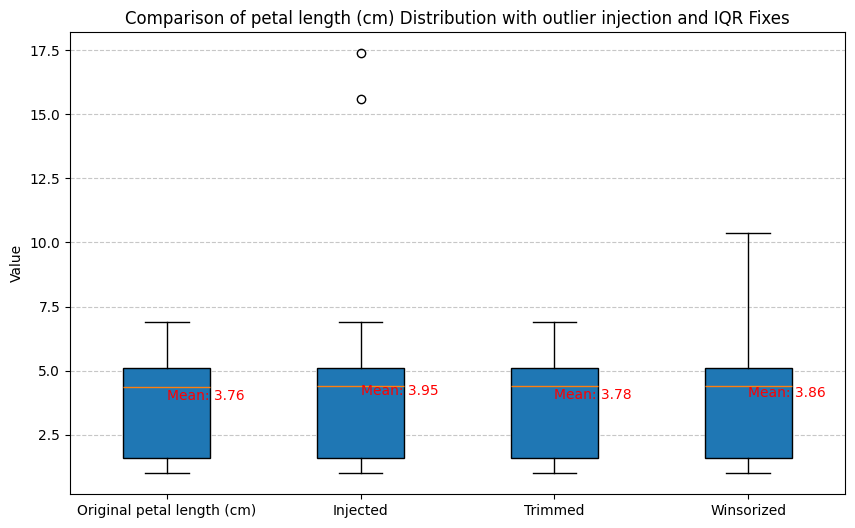

In [65]:
import matplotlib.pyplot as plt
import numpy as np

# Prepare the data for the boxplot
data_to_plot = [feature_population, injected_feature, trimmed_injected_feature, winsorized_injected_feature]
labels = [f'Original {use_feature}', 'Injected', 'Trimmed', 'Winsorized']

# Create the boxplot, removing 'showmeans=True'
plt.figure(figsize=(10, 6))
bp = plt.boxplot(data_to_plot, tick_labels=labels, patch_artist=True)

# Add titles and labels
plt.title(f'Comparison of {use_feature} Distribution with outlier injection and IQR Fixes')
plt.ylabel('Value')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate the mean values on the boxplot
# The x-coordinates for the boxes are 1 and 2
plt.text(1, np.mean(feature_population), f'Mean: {np.mean(feature_population):.2f}',
         verticalalignment='bottom', horizontalalignment='left', color='red', fontsize=10)
plt.text(2, np.mean(injected_feature), f'Mean: {np.mean(injected_feature):.2f}',
         verticalalignment='bottom', horizontalalignment='left', color='red', fontsize=10)
plt.text(3, np.mean(trimmed_injected_feature), f'Mean: {np.mean(trimmed_injected_feature):.2f}',
         verticalalignment='bottom', horizontalalignment='left', color='red', fontsize=10)
plt.text(4, np.mean(winsorized_injected_feature), f'Mean: {np.mean(winsorized_injected_feature):.2f}',
         verticalalignment='bottom', horizontalalignment='left', color='red', fontsize=10)

plt.show()

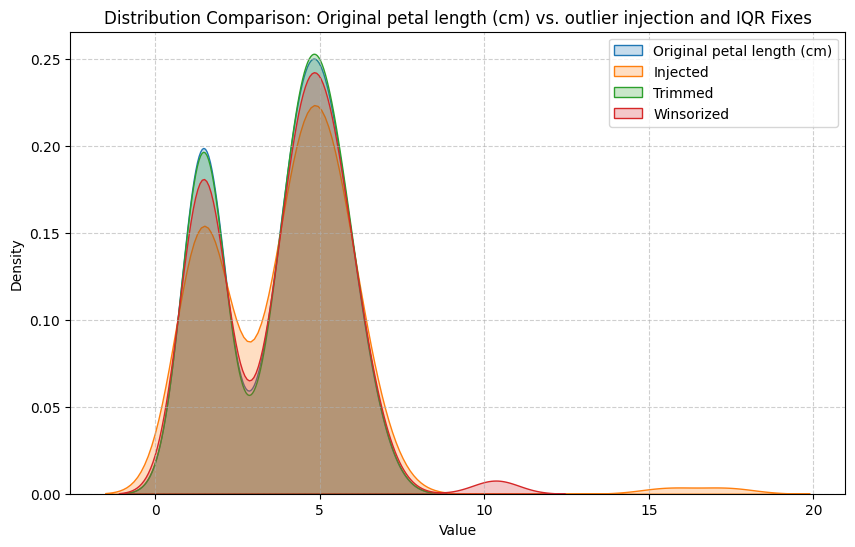

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.kdeplot(feature_population, label=f'Original {use_feature}', fill=True, alpha=0.25)
sns.kdeplot(injected_feature, label='Injected', fill=True, alpha=0.25)
sns.kdeplot(trimmed_injected_feature, label='Trimmed', fill=True, alpha=0.25)
sns.kdeplot(winsorized_injected_feature, label='Winsorized', fill=True, alpha=0.25)

plt.title(f'Distribution Comparison: Original {use_feature} vs. outlier injection and IQR Fixes')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [67]:
# **Outliers:**
# Inject 1% synthetic outliers into that feature (e.g., add +8σ values at random indices using your seed).
# Handle outliers using your assigned method outlier_method (IQR trimming/winsorizing or z-score filtering).
# Recompute mean & CI; compare before vs after in 3–5 sentences.

As expected, injecting several synthetic 8σ datapoints into the dataset shifts the mean.

Both the Trim and Winsorization methods reduce the error, returning the mean to something closer to the value prior to the outlier injection.
Although the Trim method results in shifting the mean closer to its original value, it comes at the cost of data loss.
The choice of which method to use really depends on the goals of the analysis. If data loss must be avoided, the winsorizing method preserves data, shifting outliers into the quartile range.

#Part C
**Supervised vs Unsupervised; Confusion Matrix & ROC (Lectures 10–11) — 25 pts**

**Supervised (binary classification):**
* Split the data (stratified) 70/30 (train/test).
* Train Logistic Regression (with regularization, default liblinear/lbfgs acceptable).
* Use K-fold CV with your cv_folds (coming from the code above) on the training set to report CV accuracy and CV ROC-AUC.
* On the test set, produce: confusion matrix, accuracy, sensitivity (recall for positive), specificity, and ROC curve with AUC.
* In 5–8 sentences, interpret: TP/TN/FP/FN counts (what kind of mistakes), trade-offs, and whether threshold adjustment could align with a plausible cost scenario.

In [77]:
traintest_outputparams = {
    "seed": seed,
    "dataset_pick": int(dataset_pick),
    "cv_folds": cv_folds,
    "knn_k": knn_k
}
for key, value in traintest_outputparams.items():
    print(f"{key}: {value}")

#Split the data (stratified) 70/30 (train/test).
train_test_data = df.copy()

#Randomly choose ~30% of row indices (using your personal seed)
total_test_rows = int(np.round(0.3 * len(train_test_data)))
test_indices = rng.choice(len(train_test_data), size=total_test_rows, replace=False)

train_test_data['IsTestData'] = False
for idx in test_indices:
   train_test_data.loc[idx,'IsTestData'] = True

print(f"Total Training Rows: {(train_test_data['IsTestData'] == False).sum()} ({(train_test_data['IsTestData'] == False).sum()/len(train_test_data):.2%})")
print(f"Total Testing Rows:  {(train_test_data['IsTestData'] == True).sum()}  ({(train_test_data['IsTestData'] == True).sum()/len(train_test_data):.2%})")

#K-Fold split was created during df inception.
for curFold in folds:
  print(f"K-Fold: {curFold} - {(train_test_data['k_fold_group'] == curFold).sum()} rows")

seed: 8083450
dataset_pick: 2
cv_folds: 7
knn_k: 3
Total Training Rows: 105 (70.00%)
Total Testing Rows:  45  (30.00%)
K-Fold: 1 - 22 rows
K-Fold: 2 - 22 rows
K-Fold: 3 - 22 rows
K-Fold: 4 - 21 rows
K-Fold: 5 - 21 rows
K-Fold: 6 - 21 rows
K-Fold: 7 - 21 rows


Logistic Regression model trained successfully.
Training data shape: (105, 4)
Testing data shape: (45, 4)


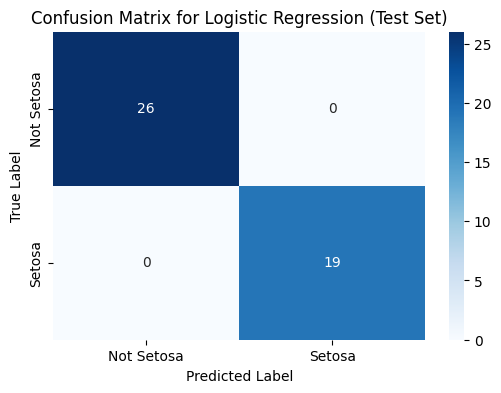


Interpretation of Confusion Matrix:

- True Negatives (TN): 26 (Correctly predicted as Not Setosa)
- False Positives (FP): 0 (Incorrectly predicted as Setosa, but actually Not Setosa)
- False Negatives (FN): 0 (Incorrectly predicted as Not Setosa, but actually Setosa)
- True Positives (TP): 19 (Correctly predicted as Setosa)
- Accuracy:(TP+TN) / (All): 1.0
- Precision:(TP/TP+FP) / (All): 1.0
- Sensitivity:(TP/TP+FN) / (All): 1.0


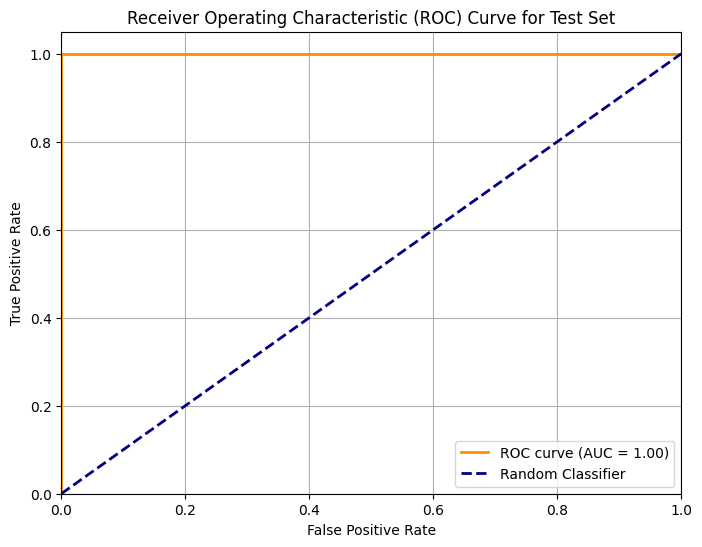

Area Under the Curve (AUC) for the test set: 1.00


In [69]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

x = train_test_data[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]
y = train_test_data['IsSetosa']

# Split data into training and testing sets based on 'IsTestData' column
train_x = x[train_test_data['IsTestData'] == False]
train_y = y[train_test_data['IsTestData'] == False]

test_x = x[train_test_data['IsTestData'] == True]
test_y = y[train_test_data['IsTestData'] == True]

# Initialize and train the Logistic Regression model
# Regularization (L2 by default) is applied by default with the 'liblinear' solver
log_reg_model = LogisticRegression(random_state=seed, solver='liblinear')
log_reg_model.fit(train_x, train_y)   #This code builds the model to fit against the training data

print("Logistic Regression model trained successfully.")
print(f"Training data shape: {train_x.shape}")
print(f"Testing data shape: {test_x.shape}")

#Predict on the test set
pred_y = log_reg_model.predict(test_x)

# Generate the confusion matrix
cmatrix = confusion_matrix(test_y, pred_y)

#Plot the confusion matrix as a heat map
plt.figure(figsize=(6, 4))
sns.heatmap(cmatrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Setosa', 'Setosa'], yticklabels=['Not Setosa', 'Setosa'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Logistic Regression (Test Set)')
plt.show()

cmatrix_results = {}
cmatrix_results['TN'] = cmatrix[0,0]
cmatrix_results['FP'] = cmatrix[0,1]
cmatrix_results['FN'] = cmatrix[1,0]
cmatrix_results['TP'] = cmatrix[1,1]

cmatrix_results['Accuracy'] = (cmatrix_results['TP'] + cmatrix_results['TN']) / (cmatrix_results['TP'] + cmatrix_results['TN'] + cmatrix_results['FP'] + cmatrix_results['FN'])
cmatrix_results['Precision'] = cmatrix_results['TP'] / (cmatrix_results['TP'] + cmatrix_results['FP'])
cmatrix_results['Sensitivity'] = cmatrix_results['TP'] / (cmatrix_results['TP'] + cmatrix_results['FN'])


print("\nInterpretation of Confusion Matrix:\n")
print(f"- True Negatives (TN): {cmatrix_results['TN']} (Correctly predicted as Not Setosa)")
print(f"- False Positives (FP): {cmatrix_results['FP']} (Incorrectly predicted as Setosa, but actually Not Setosa)")
print(f"- False Negatives (FN): {cmatrix_results['FN']} (Incorrectly predicted as Not Setosa, but actually Setosa)")
print(f"- True Positives (TP): {cmatrix_results['TP']} (Correctly predicted as Setosa)")
print(f"- Accuracy:(TP+TN) / (All): {cmatrix_results['Accuracy']}")
print(f"- Precision:(TP/TP+FP) / (All): {cmatrix_results['Precision']}")
print(f"- Sensitivity:(TP/TP+FN) / (All): {cmatrix_results['Sensitivity']}")

#Plot the receiver operating characteristic (ROC) curve with area under the curve (AUC)
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Get probability predictions for the positive class (IsSetosa == True)
pred_proba_y = log_reg_model.predict_proba(test_x)[:, 1]

# Calculate ROC curve metrics
fpr, tpr, thresholds = roc_curve(test_y, pred_proba_y)

# Calculate AUC
auc = roc_auc_score(test_y, pred_proba_y)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Test Set')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

print(f"Area Under the Curve (AUC) for the test set: {auc:.2f}")

Curiously, this model produces perfect results. That sounds too good to be true.

First, as requested, let's use the k-fold cross-validations (for 7 folds) on the training set to report the cross-validation accuracy.
This will use the model built on the training data (randomly selected 70% of the data) against the k-fold test samples (randomly selected 1/7th of the data). Note that, as these two sample sets were independently selected, there is likely overlap. This means that the test is being performed using some of what was in the training data, and some of what might not have been.

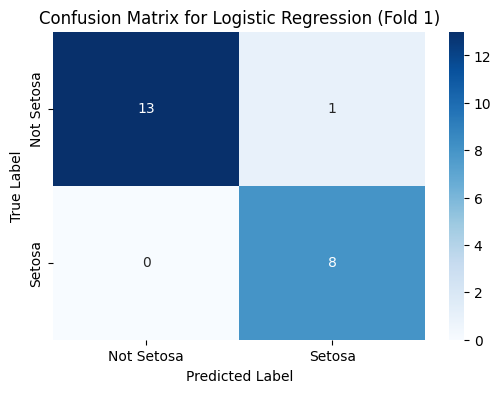

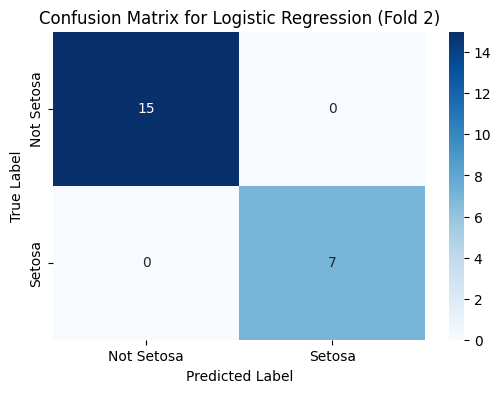

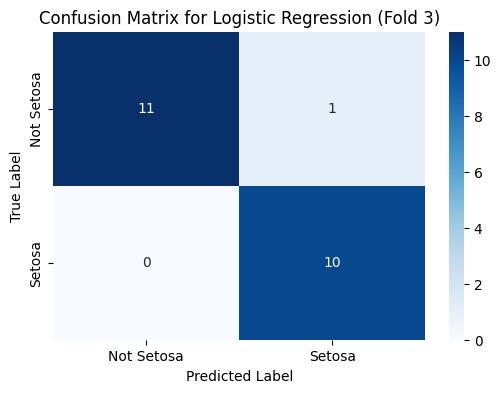

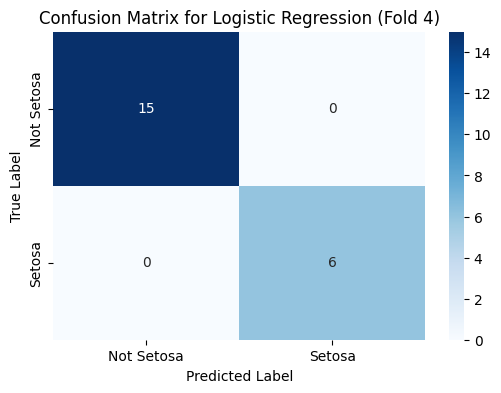

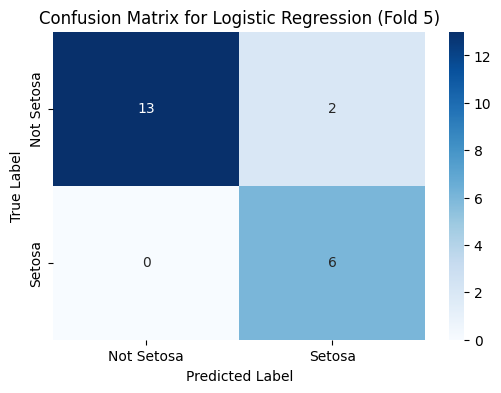

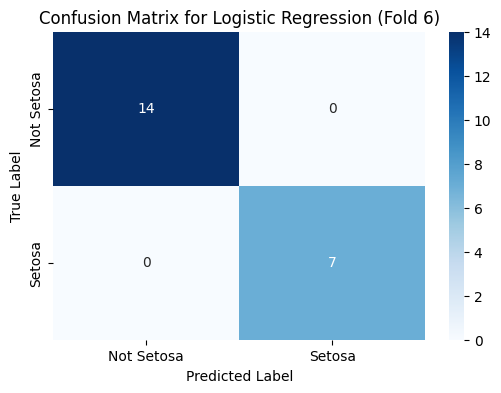

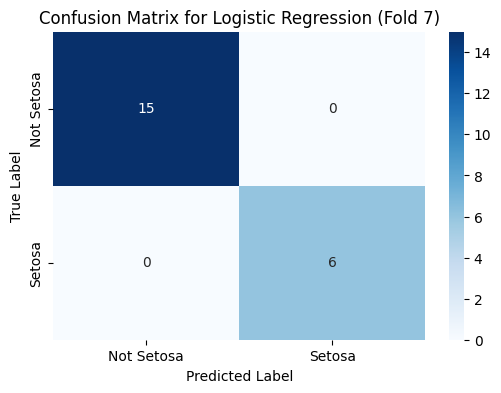

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cmatrix = {} # Initialize cmatrix as a dictionary to store results for each fold
predk_y = {} # Initialize predk_y as a dictionary to store predictions for each fold

testk_x = {}
testk_y = {}

for curFold in folds:
   # Split data into testing sets based on 'k_fold_group' for the current fold
  testk_x[curFold] = x[train_test_data['k_fold_group'] == curFold]
  testk_y[curFold] = y[train_test_data['k_fold_group'] == curFold]

  #Predict on the test set
  predk_y[curFold] = log_reg_model.predict(testk_x[curFold])

  # Generate the confusion matrix
  cmatrix[curFold] = confusion_matrix(testk_y[curFold], predk_y[curFold])

  #Plot the confusion matrix as a heat map
  plt.figure(figsize=(6, 4))
  sns.heatmap(cmatrix[curFold], annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Setosa', 'Setosa'], yticklabels=['Not Setosa', 'Setosa'])
  plt.xlabel('Predicted Label')
  plt.ylabel('True Label')

  plt.title(f'Confusion Matrix for Logistic Regression (Fold {curFold})')
  plt.show()

Again, we see that the model which was constructed has a perfect selection of the results with 100% accuracy and 100% sensitivity.
This is highly abnormal.

For deeper analysis, what if we discarded the 70/30 train/test data, and reattempted to build the model using k-fold cross-validation alone?

Logistic Regression model trained successfully for Fold 1.
Training data shape for Fold 1: (128, 4)
Testing data shape for Fold 1: (22, 4)
Logistic Regression model trained successfully for Fold 2.
Training data shape for Fold 2: (128, 4)
Testing data shape for Fold 2: (22, 4)
Logistic Regression model trained successfully for Fold 3.
Training data shape for Fold 3: (128, 4)
Testing data shape for Fold 3: (22, 4)
Logistic Regression model trained successfully for Fold 4.
Training data shape for Fold 4: (129, 4)
Testing data shape for Fold 4: (21, 4)
Logistic Regression model trained successfully for Fold 5.
Training data shape for Fold 5: (129, 4)
Testing data shape for Fold 5: (21, 4)
Logistic Regression model trained successfully for Fold 6.
Training data shape for Fold 6: (129, 4)
Testing data shape for Fold 6: (21, 4)
Logistic Regression model trained successfully for Fold 7.
Training data shape for Fold 7: (129, 4)
Testing data shape for Fold 7: (21, 4)


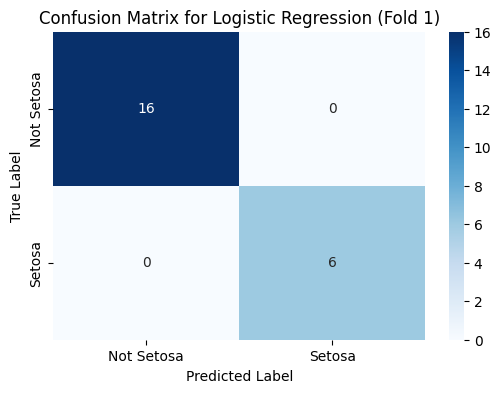

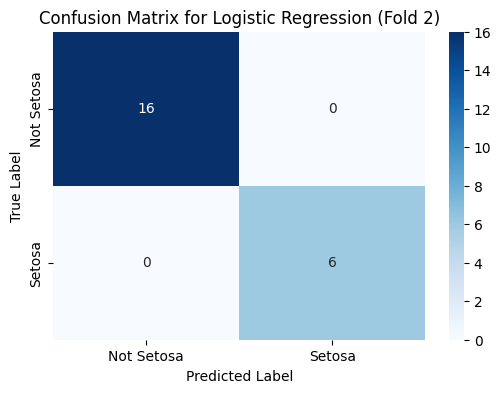

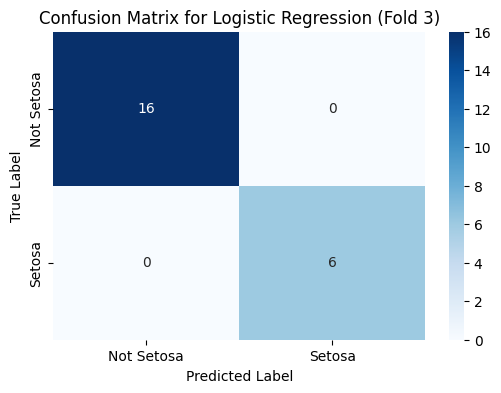

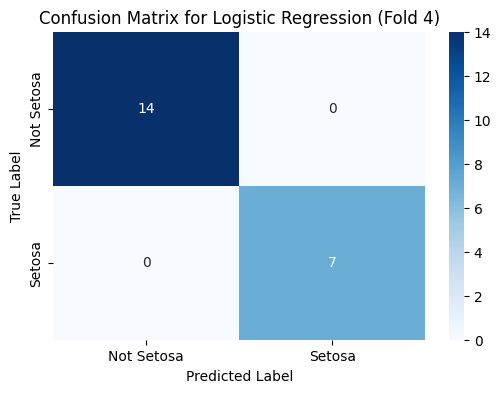

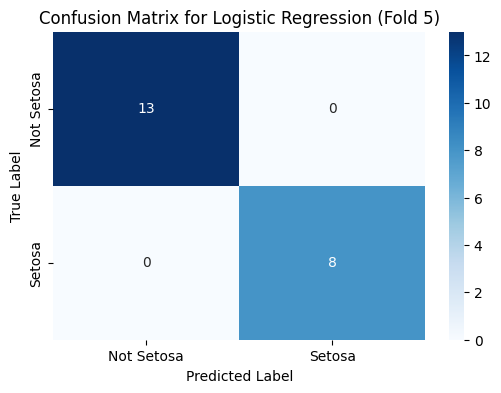

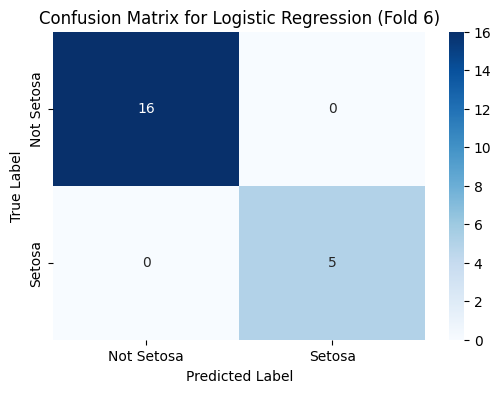

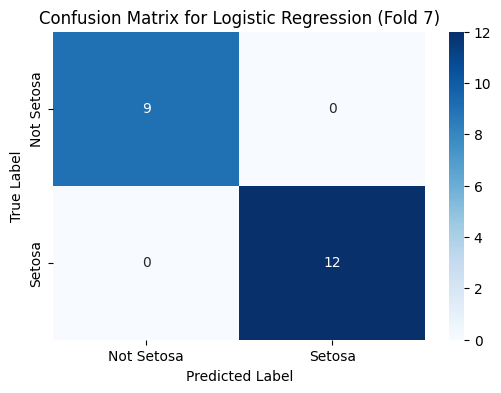

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

x = train_test_data[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]
y = train_test_data['IsSetosa']

traink_x = {}
traink_y = {}
testk_x = {}
testk_y = {}
log_reg_modelk = {}

for curFold in folds:
  # Split data into training and testing sets based on 'k_fold_group' for the current fold
  traink_x[curFold] = x[train_test_data['k_fold_group'] != curFold]
  traink_y[curFold] = y[train_test_data['k_fold_group'] != curFold]

  testk_x[curFold] = x[train_test_data['k_fold_group'] == curFold]
  testk_y[curFold] = y[train_test_data['k_fold_group'] == curFold]

  # Initialize and train the Logistic Regression model for the current fold
  # Regularization (L2 by default) is applied by default with the 'liblinear' solver
  log_reg_modelk[curFold] = LogisticRegression(random_state=seed, solver='liblinear')
  log_reg_modelk[curFold].fit(traink_x[curFold], traink_y[curFold])

  print(f"Logistic Regression model trained successfully for Fold {curFold}.")
  print(f"Training data shape for Fold {curFold}: {traink_x[curFold].shape}")
  print(f"Testing data shape for Fold {curFold}: {testk_x[curFold].shape}")

cmatrix = {} # Initialize cmatrix as a dictionary to store results for each fold
predk_y = {} # Initialize predk_y as a dictionary to store predictions for each fold

for curFold in folds:
  #Predict on the test set
  predk_y[curFold] = log_reg_modelk[curFold].predict(testk_x[curFold])

  # Generate the confusion matrix
  cmatrix[curFold] = confusion_matrix(testk_y[curFold], predk_y[curFold])

  #Plot the confusion matrix as a heat map
  plt.figure(figsize=(6, 4))
  sns.heatmap(cmatrix[curFold], annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Setosa', 'Setosa'], yticklabels=['Not Setosa', 'Setosa'])
  plt.xlabel('Predicted Label')
  plt.ylabel('True Label')
  #  plt.title('Confusion Matrix for Logistic Regression (Test Set)')
  plt.title(f'Confusion Matrix for Logistic Regression (Fold {curFold})')
  plt.show()

The above showed that, when training then testing against the data split in a different way (70/30 vs split 7 ways) we achieved the same 100% accuracy.

*What if Setosa is very easy to discriminate from the other petal types?*

Can we rerun the train vs test process against the remaining petal types?

If so, will we find the same perfect results?

Logistic Regression model trained successfully.
Training data shape: (105, 4)
Testing data shape: (45, 4)


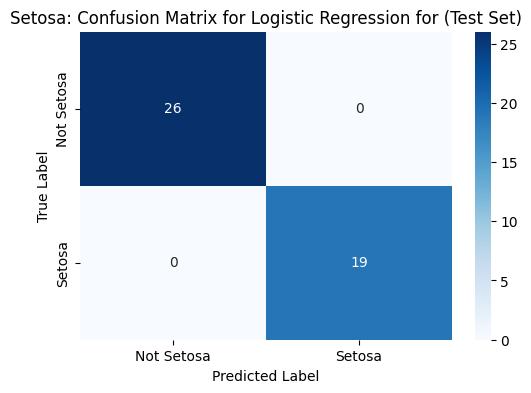


Interpretation of Confusion Matrix:

- True Negatives (TN): 26 (Correctly predicted as Not Setosa)
- False Positives (FP): 0 (Incorrectly predicted as Setosa, but actually Not Setosa)
- False Negatives (FN): 0 (Incorrectly predicted as Not Setosa, but actually Setosa)
- True Positives (TP): 19 (Correctly predicted as Setosa)
- Accuracy:(TP+TN)/(All): 1.0
- Precision:(TP/TP+FP): 1.0
- Sensitivity:(TP/TP+FN): 1.0


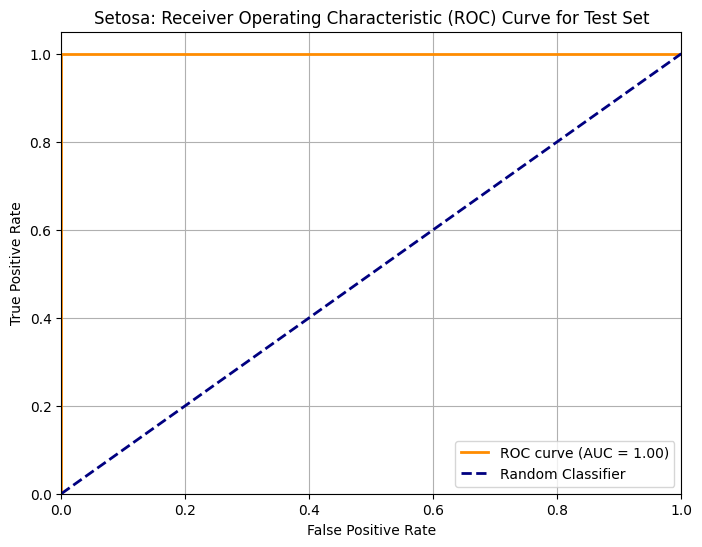

Area Under the Curve (AUC) for the test set: 1.00
Logistic Regression model trained successfully.
Training data shape: (105, 4)
Testing data shape: (45, 4)


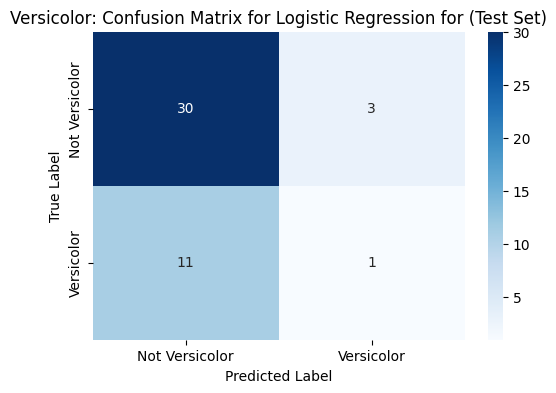


Interpretation of Confusion Matrix:

- True Negatives (TN): 30 (Correctly predicted as Not Versicolor)
- False Positives (FP): 3 (Incorrectly predicted as Versicolor, but actually Not Versicolor)
- False Negatives (FN): 11 (Incorrectly predicted as Not Versicolor, but actually Versicolor)
- True Positives (TP): 1 (Correctly predicted as Versicolor)
- Accuracy:(TP+TN)/(All): 0.6888888888888889
- Precision:(TP/TP+FP): 0.25
- Sensitivity:(TP/TP+FN): 0.08333333333333333


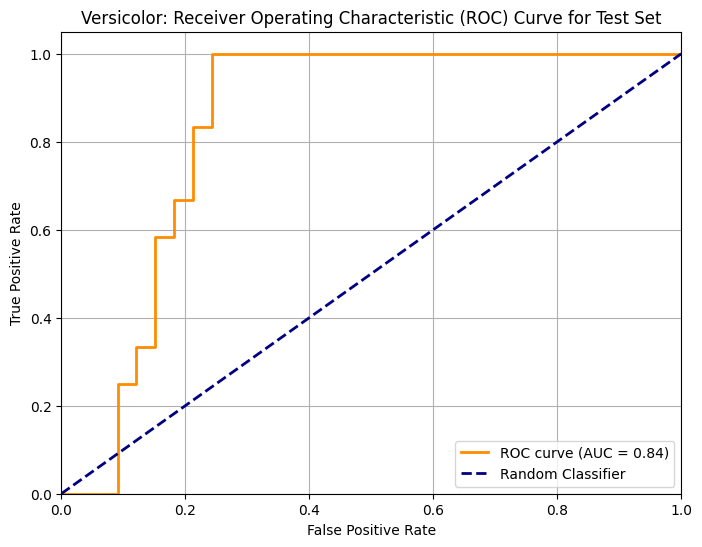

Area Under the Curve (AUC) for the test set: 0.84
Logistic Regression model trained successfully.
Training data shape: (105, 4)
Testing data shape: (45, 4)


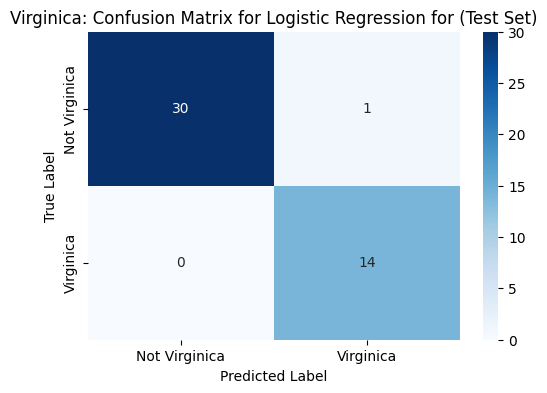


Interpretation of Confusion Matrix:

- True Negatives (TN): 30 (Correctly predicted as Not Virginica)
- False Positives (FP): 1 (Incorrectly predicted as Virginica, but actually Not Virginica)
- False Negatives (FN): 0 (Incorrectly predicted as Not Virginica, but actually Virginica)
- True Positives (TP): 14 (Correctly predicted as Virginica)
- Accuracy:(TP+TN)/(All): 0.9777777777777777
- Precision:(TP/TP+FP): 0.9333333333333333
- Sensitivity:(TP/TP+FN): 1.0


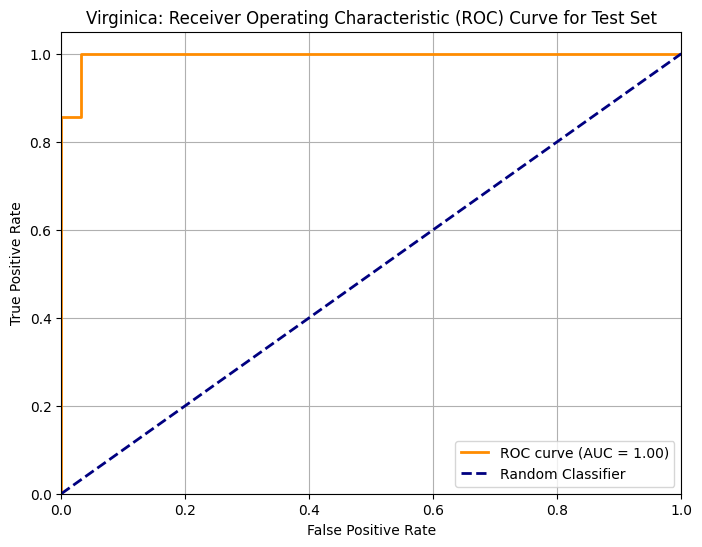

Area Under the Curve (AUC) for the test set: 1.00


In [72]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

petaltype = ['Setosa','Versicolor', 'Virginica']
for curPetal in petaltype:

  x = train_test_data[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]
  y = train_test_data['Is'+ curPetal]

  # Split data into training and testing sets based on 'IsTestData' column
  train_x = x[train_test_data['IsTestData'] == False]
  train_y = y[train_test_data['IsTestData'] == False]

  test_x = x[train_test_data['IsTestData'] == True]
  test_y = y[train_test_data['IsTestData'] == True]

  # Initialize and train the Logistic Regression model
  # Regularization (L2 by default) is applied by default with the 'liblinear' solver
  log_reg_model = LogisticRegression(random_state=seed, solver='liblinear')
  log_reg_model.fit(train_x, train_y)   #This code builds the model to fit against the training data

  print("Logistic Regression model trained successfully.")
  print(f"Training data shape: {train_x.shape}")
  print(f"Testing data shape: {test_x.shape}")

  #Predict on the test set
  pred_y = log_reg_model.predict(test_x)

  # Generate the confusion matrix
  cmatrix = confusion_matrix(test_y, pred_y)

  #Plot the confusion matrix as a heat map
  plt.figure(figsize=(6, 4))
  sns.heatmap(cmatrix, annot=True, fmt='d', cmap='Blues',
              xticklabels=['Not '+curPetal, curPetal], yticklabels=['Not '+ curPetal, curPetal])
  plt.xlabel('Predicted Label')
  plt.ylabel('True Label')
  plt.title(curPetal + ': Confusion Matrix for Logistic Regression for (Test Set)')
  plt.show()

  cmatrix_results = {}
  cmatrix_results['TN'] = cmatrix[0,0]
  cmatrix_results['FP'] = cmatrix[0,1]
  cmatrix_results['FN'] = cmatrix[1,0]
  cmatrix_results['TP'] = cmatrix[1,1]

  cmatrix_results['Accuracy'] = (cmatrix_results['TP'] + cmatrix_results['TN']) / (cmatrix_results['TP'] + cmatrix_results['TN'] + cmatrix_results['FP'] + cmatrix_results['FN'])
  cmatrix_results['Precision'] = cmatrix_results['TP'] / (cmatrix_results['TP'] + cmatrix_results['FP'])
  cmatrix_results['Sensitivity'] = cmatrix_results['TP'] / (cmatrix_results['TP'] + cmatrix_results['FN'])

  print("\nInterpretation of Confusion Matrix:\n")
  print(f"- True Negatives (TN): {cmatrix_results['TN']} (Correctly predicted as Not {curPetal})")
  print(f"- False Positives (FP): {cmatrix_results['FP']} (Incorrectly predicted as {curPetal}, but actually Not {curPetal})")
  print(f"- False Negatives (FN): {cmatrix_results['FN']} (Incorrectly predicted as Not {curPetal}, but actually {curPetal})")
  print(f"- True Positives (TP): {cmatrix_results['TP']} (Correctly predicted as {curPetal})")
  print(f"- Accuracy:(TP+TN)/(All): {cmatrix_results['Accuracy']}")
  print(f"- Precision:(TP/TP+FP): {cmatrix_results['Precision']}")
  print(f"- Sensitivity:(TP/TP+FN): {cmatrix_results['Sensitivity']}")

  #Plot the receiver operating characteristic (ROC) curve with area under the curve (AUC)
  from sklearn.metrics import roc_curve, roc_auc_score
  import matplotlib.pyplot as plt

  # Get probability predictions for the positive class (IsVersicolor == True)
  pred_proba_y = log_reg_model.predict_proba(test_x)[:, 1]

  # Calculate ROC curve metrics
  fpr, tpr, thresholds = roc_curve(test_y, pred_proba_y)

  # Calculate AUC
  auc = roc_auc_score(test_y, pred_proba_y)

  # Plot the ROC curve
  plt.figure(figsize=(8, 6))
  plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc:.2f})')
  plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title(curPetal + ': Receiver Operating Characteristic (ROC) Curve for Test Set')
  plt.legend(loc='lower right')
  plt.grid(True)
  plt.show()

  print(f"Area Under the Curve (AUC) for the test set: {auc:.2f}")

#Part C: Interpretation:

We used 70% of the data to produce a model, tested that against the remaining 30% of the data, and found the model to perfectly predict the results: 100% accuracy and 100% sensitivity. This is abnormal for most real world scenarios.

Rerunning the test against a random and independently selected 1/7th of the data set, we found that again, the model perfectly matched the results. This makes sense, as if the model was built on training data and produced perfect test results, re-testing using various slices of the same source data would produce the same result.

To fully test, we tried rebuilding the model 7 times - one for each k-fold. Naturally, these k-fold results displayed perfect separation of the data.

Running the process against Versicolor and Virginica, we saw very different results. This reassures me that the code is working properly.

It's clear that the data clearly shows a strong ability to discriminate for Setosa, but that same ability for Versicolor or Virginica.

##Part C: Unsupervised (structure discovery):
* Standardize numeric features, run KMeans (k=2).
* Compare clusters to the true binary labels using Adjusted Rand Index (ARI); briefly interpret what a high vs low ARI implies about separability without labels.
* Parametric/non-parametric/probabilistic (concepts):
* State which of Logistic Regression, KNN, Decision Tree, Naïve Bayes, Random Forest, MLP are parametric / non-parametric / probabilistic, with a one-line justification each (no code needed here).

In [73]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

# Identify numeric features for standardization
numeric_features = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

# Initialize StandardScaler
scaler = StandardScaler()

# Apply fit_transform to the numeric features
df_scaled_features = scaler.fit_transform(df[numeric_features])

# Create a new DataFrame for the scaled features
df_scaled = pd.DataFrame(df_scaled_features, columns=numeric_features)

print("Numeric features standardized and stored in 'df_scaled'.")
print(df_scaled.head())

# Initialize KMeans model with n_clusters=2 and random_state=seed
kmeans = KMeans(n_clusters=2, random_state=seed, n_init=10) # n_init is added to suppress warning

# Fit the KMeans model to the df_scaled DataFrame
kmeans.fit(df_scaled)

# Store the cluster labels assigned by KMeans in a new column named 'kmeans_cluster' in the original df DataFrame
df_ARI_test = df.copy()
df_ARI_test['kmeans_cluster'] = kmeans.labels_

petaltype = ['Setosa','Versicolor', 'Virginica']
for curPetal in petaltype:
  # The target for binary classification is 'IsSetosa'
  true_labels = df_ARI_test['Is'+curPetal].astype(int) # Convert boolean to integer (0 or 1)

  # Get the KMeans cluster labels
  kmeans_labels = df_ARI_test['kmeans_cluster']

  # Calculate the Adjusted Rand Index
  ari_score = adjusted_rand_score(true_labels, kmeans_labels)

  print(f"Adjusted Rand Index (ARI) between 'Is{curPetal}' and KMeans clusters: {ari_score:.3f}")

Numeric features standardized and stored in 'df_scaled'.
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0          -0.900681          1.019004          -1.340227         -1.315444
1          -1.143017         -0.131979          -1.340227         -1.315444
2          -1.385353          0.328414          -1.397064         -1.315444
3          -1.506521          0.098217          -1.283389         -1.315444
4          -1.021849          1.249201          -1.340227         -1.315444
Adjusted Rand Index (ARI) between 'IsSetosa' and KMeans clusters: 1.000
Adjusted Rand Index (ARI) between 'IsVersicolor' and KMeans clusters: 0.095
Adjusted Rand Index (ARI) between 'IsVirginica' and KMeans clusters: 0.095


###Part C.2: Interpretation

A high adjusted rand index (ARI) close to 1 signifies a strong agreement between your found clusters and the actual groupings in the data. A value of 1 indicates a perfect agreement. The features we used for clustering allowed the KMeans to perfectly distinguish between Setosa and non-Setosa flowers.

This further cements the realization from our earlier analysis - that the determination of Setosa is strongly represented by the data, and that the discrimination of Versicolor and Virginica (at 0.095) is not as clear.

A low ARI score would indicate that the clustering isn't as good at separating the records into groups that align with true labels. Notably, a negative ARI implies that the clustering is worse than random.

###Part C.3: Parametric/non-parametric/probabilistic:

**State which of Logistic Regression, KNN, Decision Tree, Naïve Bayes, Random Forest, MLP are parametric / non-parametric / probabilistic, with a justification for each**

**Logistic Regression: Probabilistic & Parametric**
* Logistic regression uses parameters to determine the probability that a value falls into one of two camps.

**K-Nearest Neighbors (KNN): Non-parametric**
* KNN is non-parametric as it makes no assumptions about the underlying data distribution.

**Decision Tree: Non-parametric**
* Decision Trees are non-parametric as the number of parameters grows only with the complexity of the tree

**Naïve Bayes: Probabilistic & Parametric**
* This method calculates the probability of a data point belonging to a class using Bayes' theorem. It assumes that features follow known distributions using parameters learned from the training data.

**Random Forest: Probabilistic & Non-parametric**
* This method averages predictions from many trees to give a probabilistic output for the proportion of trees voting for a particular class. Like the decision tree, it learns complex patterns, growing with the complexity of the collective trees.

**Multi-Layer Perceptron (MLP): Probabilistic & Parametric**
* Utilizing a softmax function, this method will output the probability that an input belongs to a specific class. It is parametric as it learns using a large number of parameters which are tuned during training.

Part D — Mini Model Zoo & Hyperparameters (Lecture 11) — 15 pts
Train two additional models with your assigned hyperparameters:
	KNN with n_neighbors = knn_k  (coming from the code above)
	Decision Tree with max_depth = tree_depth (coming from the code above)
For each:
	Report test accuracy and balanced accuracy (to mitigate class imbalance).
	In 3–5 sentences per model, explain how it works, whether it is parametric/non-parametric/probabilistic, and the typical effect of your chosen hyperparameter on variance/bias.

Brief concept explanations:
Balanced Accuracy
	Average of recall on the positive class and recall on the negative class:
"Balanced Acc"=("TPR (sensitivity)" +"TNR (specificity)" )/2.

	Useful when classes are imbalanced; treats both classes equally.

##Part D — Mini Model Zoo & Hyperparameters (Lecture 11) — 15 pts


**Train two additional models with your assigned hyperparameters:**
	KNN with n_neighbors = knn_k  (coming from the code above)
	Decision Tree with max_depth = tree_depth (coming from the code above)
For each:
	Report test accuracy and balanced accuracy (to mitigate class imbalance).
	In 3–5 sentences per model, explain how it works, whether it is parametric/non-parametric/probabilistic, and the typical effect of your chosen hyperparameter on variance/bias.

Brief concept explanations:
Balanced Accuracy
	Average of recall on the positive class and recall on the negative class:
"Balanced Acc"=("TPR (sensitivity)" +"TNR (specificity)" )/2.

	Useful when classes are imbalanced; treats both classes equally.

##Part E — Simulation & Randomness (Lecture 12) — 10 pts

Simulate N ∈ {100, 1,000, 10,000} coin flips with bias p = sim_bias_p (coming from the code above):

Estimate p ̂for each N; plot p ̂vs N) to show convergence (Law of Large Numbers).

In 3–5 sentences, explain the role of randomness in simulation, why estimates stabilize, and what would change for a smaller/larger N.

#Part F — Regex & TF-IDF & Sentiment (Lecture 13) — 15 pts

**Regex:**
Create a small raw text (8–12 lines) that includes at least emails, dates, and IDs (e.g., “ORD-1234”).

Write regex patterns to extract: all emails, all dates (flexible formats), and all “ID-like” tokens (prefix+digits). Show the matches.

Briefly explain alternation, character sets, anchors, and quantifiers you used (1–2 lines each).

**NLP mini-task:**
Build a tiny labeled corpus of 10–16 sentences (half “positive”, half “negative”).
Compute TF-IDF features and train Logistic Regression to classify sentiment.

Answer: What happens to TF-IDF of a term that appears in all documents vs. a term that appears in few documents? Why? (3–4 sentences)

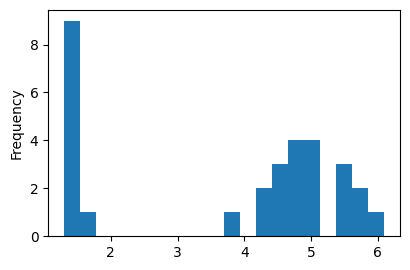

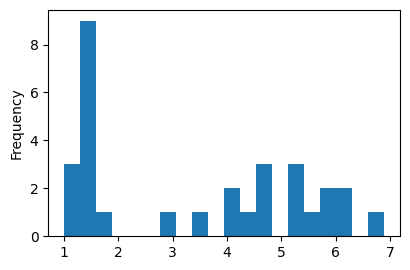

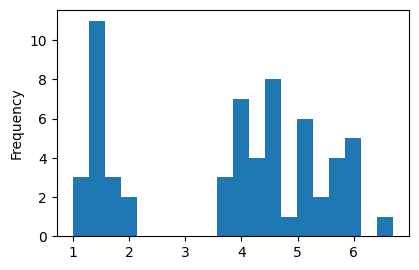

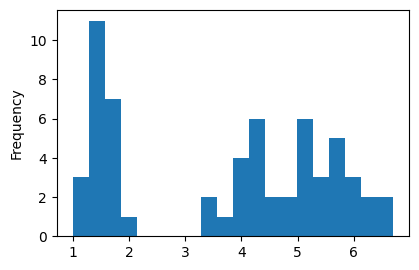

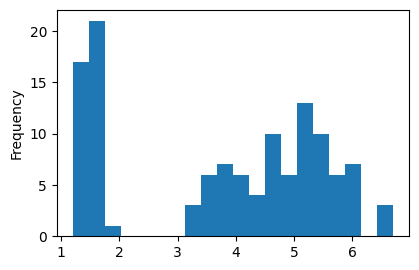

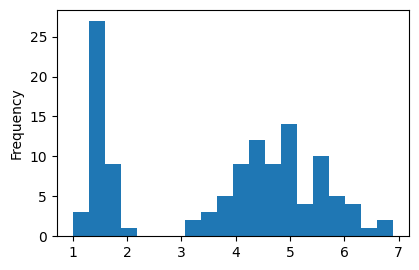

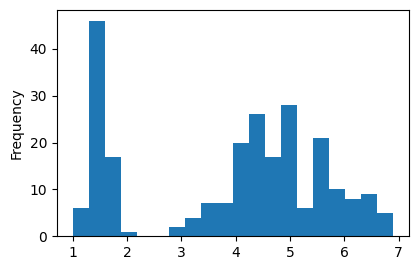

Sample size 240, Without Replacement: No data available for plotting.


In [74]:
import pandas as pd # Ensure pandas is imported
import matplotlib.pyplot as plt # Import matplotlib for showing plots

for n in sample_sizes:
  for curSubset in ["With Replacement", "Without Replacement"]:
    if n in sample_results[curSubset] and sample_results[curSubset][n] is not None:
      # Convert the numpy array to a pandas Series before plotting
      pd.Series(sample_results[curSubset][n]).plot.hist(subplots=True, layout=(3,2), figsize=(10, 10), bins=20)
      plt.title(f"Histogram for n={n} ({curSubset})") # Add title to distinguish plots
      plt.xlabel(use_feature)
      plt.ylabel("Frequency")
      plt.show() # Display each plot immediately
    else:
      print(f"Sample size {n}, {curSubset}: No data available for plotting.")